In [1]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Read the CSV file and Display the first 5 rows
df = pd.read_csv(r"D:\Cdac_Project\Mini_Project\Walmart-Retail-Dataset.csv")
df.head()

C:\Users\Payal\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (22,23,24,25,26,27,28) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,city,customer_age,customer_name,customer_segment,discount,order_date,order_id,order_priority,order_quantity,product_base_margin,...,shipping_cost,state,unit_price,zip_code,adjusted_col,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28
0,Stevens Point,60,Dennis Bolton,Corporate,0.17,29-02-2020,a42c8cff-5757-4e94-80b0-807538fefd25,Not Specified,7,0.55,...,3.772509354,Wisconsin,3.29,54481,NaN,NaN,NaN,NaN,NaN,NaN
1,Stevens Point,60,Dennis Bolton,Corporate,0.17,29-02-2020,1c37f301-564f-40ff-bd7d-73a6c06ede1a,Not Specified,7,0.55,...,816.3408935,Wisconsin,258.98,54481,NaN,NaN,NaN,NaN,NaN,NaN
2,Grapevine,49,Anthony Garverick,Small Business,0.05,11-11-2021,ec649eae-535d-4154-b3ef-c4405bd59da9,Medium,42,0.69,...,4530.505983,Texas,145.98,76051,NaN,NaN,NaN,NaN,NaN,NaN
3,Tempe,30,Anne McFarland,Consumer,0.05,02-08-2020,efdcbace-5320-4005-95e2-4c94a896dc8c,Not Specified,30,0.37,...,128.7315052,Arizona,6.68,85281,NaN,NaN,NaN,NaN,NaN,NaN
4,Coconut Creek,80,Raymond Fair,Home Office,0.14,13-08-2021,8fd6c0f6-9e28-45b5-ba21-a57021ae304d,Low,44,\N,...,33.60838488,Florida,42.76,33063,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
#Display summary of dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1039852 entries, 0 to 1039851
Data columns (total 29 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   city                  1039831 non-null  object
 1   customer_age          1039841 non-null  object
 2   customer_name         1039827 non-null  object
 3   customer_segment      1037251 non-null  object
 4   discount              1039839 non-null  object
 5   order_date            1039837 non-null  object
 6   order_id              1039836 non-null  object
 7   order_priority        1037678 non-null  object
 8   order_quantity        1039825 non-null  object
 9   product_base_margin   1039825 non-null  object
 10  product_category      1039824 non-null  object
 11  product_container     1035078 non-null  object
 12  product_name          1035067 non-null  object
 13  product_sub_category  1035078 non-null  object
 14  profit                1035078 non-null  object
 15

In [4]:
#Drop unwanted columns
dff = df.drop(['Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26','Unnamed: 27', 'Unnamed: 28'],axis=1)

In [5]:
dff.columns

Index(['city', 'customer_age', 'customer_name', 'customer_segment', 'discount',
       'order_date', 'order_id', 'order_priority', 'order_quantity',
       'product_base_margin', 'product_category', 'product_container',
       'product_name', 'product_sub_category', 'profit', 'region', 'sales',
       'ship_date', 'ship_mode', 'shipping_cost', 'state', 'unit_price',
       'zip_code', 'adjusted_col'],
      dtype='object')

In [6]:
#Count number of unique values in each column
unique_counts = dff.nunique()
print(unique_counts)

city                       6195
customer_age                 83
customer_name              5560
customer_segment             15
discount                     36
order_date                 1483
order_id                1035093
order_priority               22
order_quantity               67
product_base_margin          62
product_category             14
product_container            22
product_name               1268
product_sub_category         27
profit                   970645
region                    17699
sales                    192556
ship_date                 11619
ship_mode                  1487
shipping_cost           1013412
state                     17750
unit_price                  778
zip_code                   2867
adjusted_col               2794
dtype: int64


In [7]:
#Count number of unique values in specific column
unique_values = dff['customer_segment'].unique()
print(unique_values)

['Corporate' 'Small Business' 'Consumer' 'Home Office' '\\N' nan
 'a33fbd5f-2d51-4013-97b8-59903883fe44' '6' '44512' '7.28' 'Central' '19'
 '6.28' '0.36' 'Connecticut' '1054.17']


In [8]:
#check null values
dff.isnull().sum()

city                         21
customer_age                 11
customer_name                25
customer_segment           2601
discount                     13
order_date                   15
order_id                     16
order_priority             2174
order_quantity               27
product_base_margin          27
product_category             28
product_container          4774
product_name               4785
product_sub_category       4774
profit                     4774
region                     4774
sales                      4774
ship_date                  4775
ship_mode                  8205
shipping_cost              4842
state                      4778
unit_price                 4778
zip_code                   4778
adjusted_col            1022150
dtype: int64

In [9]:
#calculate percentage of null values in each column
null_percentage = dff.isnull().mean() * 100

In [10]:
print(null_percentage)

city                     0.002020
customer_age             0.001058
customer_name            0.002404
customer_segment         0.250132
discount                 0.001250
order_date               0.001443
order_id                 0.001539
order_priority           0.209068
order_quantity           0.002597
product_base_margin      0.002597
product_category         0.002693
product_container        0.459104
product_name             0.460162
product_sub_category     0.459104
profit                   0.459104
region                   0.459104
sales                    0.459104
ship_date                0.459200
ship_mode                0.789055
shipping_cost            0.465643
state                    0.459488
unit_price               0.459488
zip_code                 0.459488
adjusted_col            98.297642
dtype: float64


In [11]:
#Convert specified columns to numeric data types
numerical_columns = ['customer_age','discount', 'order_quantity', 
                     'product_base_margin', 'profit', 'sales', 
                     'shipping_cost', 'unit_price']

#Apply the conversion to numeric for the selected columns in the DataFrame
dff[numerical_columns] = dff[numerical_columns].apply(pd.to_numeric, errors='coerce')

In [12]:
print(dff.dtypes)  # Check that columns are now the correct datatype

city                     object
customer_age            float64
customer_name            object
customer_segment         object
discount                float64
order_date               object
order_id                 object
order_priority           object
order_quantity          float64
product_base_margin     float64
product_category         object
product_container        object
product_name             object
product_sub_category     object
profit                  float64
region                   object
sales                   float64
ship_date                object
ship_mode                object
shipping_cost           float64
state                    object
unit_price              float64
zip_code                 object
adjusted_col             object
dtype: object


In [13]:
dff['zip_code'] = dff['zip_code'].astype(str)

In [14]:
df = pd.read_csv(r"D:\Cdac_Project\Mini_Project\final_file.csv")
df.head()

,city,customer_age,customer_name,customer_segment,discount,order_date,order_id,order_priority,order_quantity,product_base_margin,...,product_sub_category,profit,region,sales,ship_date,ship_mode,shipping_cost,state,unit_price,zip_code
0,Stevens Point,60,Dennis Bolton,Corporate,0.17,2020-02-29,a42c8cff-5757-4e94-80b0-807538fefd25,Not Specified,7,0.55,...,Chairs & Chairmats,19559.92268,Central,21.84,02-03-2020,Delivery Truck,3.772509,Wisconsin,3.29,54481.0
1,Stevens Point,60,Dennis Bolton,Corporate,0.17,2020-02-29,1c37f301-564f-40ff-bd7d-73a6c06ede1a,Not Specified,7,0.55,...,Chairs & Chairmats,19559.92268,Central,1811.67,07-03-2020,Delivery Truck,816.340893,Wisconsin,258.98,54481.0
2,Grapevine,49,Anthony Garverick,Small Business,0.05,2021-11-11,ec649eae-535d-4154-b3ef-c4405bd59da9,Medium,42,0.69,...,Tables,7535.93880,Central,6129.06,15-11-2021,Delivery Truck,4530.505983,Texas,145.98,76051.0
3,Tempe,30,Anne McFarland,Consumer,0.05,2020-08-02,efdcbace-5320-4005-95e2-4c94a896dc8c,Not Specified,30,0.37,...,Paper,18860.92419,West,198.90,08-08-2020,Regular Air,128.731505,Arizona,6.68,85281.0
4,Upper Arlington,84,Sara Luxemburg,Corporate,0.25,2020-09-26,6b88eca0-426a-4fd4-83c6-1657c43f94a0,High,31,0.77,...,Computer Peripherals,20175.51620,East,243.97,30-09-2020,Express Air,17.811073,Ohio,8.12,43221.0


In [15]:
df.columns

Index(['city', 'customer_age', 'customer_name', 'customer_segment', 'discount',
       'order_date', 'order_id', 'order_priority', 'order_quantity',
       'product_base_margin', 'product_category', 'product_container',
       'product_name', 'product_sub_category', 'profit', 'region', 'sales',
       'ship_date', 'ship_mode', 'shipping_cost', 'state', 'unit_price',
       'zip_code'],
      dtype='object')

In [16]:
df.dtypes

city                     object
customer_age              int64
customer_name            object
customer_segment         object
discount                float64
order_date               object
order_id                 object
order_priority           object
order_quantity            int64
product_base_margin     float64
product_category         object
product_container        object
product_name             object
product_sub_category     object
profit                  float64
region                   object
sales                   float64
ship_date                object
ship_mode                object
shipping_cost           float64
state                    object
unit_price              float64
zip_code                float64
dtype: object

In [17]:
#Checking for outliers in target column

#Calculating Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['sales'].quantile(0.25)
Q3 = df['sales'].quantile(0.75)

#Calculating the IQR (Interquartile Range)
IQR = Q3 - Q1

#Defining outliers based on 1.5*IQR(Inter Quartile Range)
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

                
outliers = df['sales'].apply(lambda x: (x if x < lower_bound else None ) or (x if x > upper_bound else None))
print("Outlier count is",outliers.count())

Outlier count is 124888


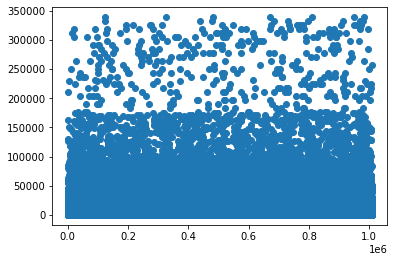

In [18]:
#Outliers using Scatter plot
plt.scatter(df.index, df['sales'])
plt.show()

In [19]:
print(lower_bound,upper_bound)

-2428.95 4408.89


In [20]:
grupper=(df['sales']>4408.89).sum()
print("No. of Outliers greater than upper_bound=",grupper)

No. of Outliers greater than upper_bound= 124888


In [21]:
lrlower=(df['sales']<-2428.95).sum()
print("No. of Outliers lower than lower_bound=",lrlower)

No. of Outliers lower than lower_bound= 0


In [22]:
#Replacing the lower outliers by lower_bound and higher outliers by upper_bound
df['sales'] = df['sales'].apply(lambda x: lower_bound if x < lower_bound else (upper_bound if x > upper_bound else x))

In [23]:
df.head()

,city,customer_age,customer_name,customer_segment,discount,order_date,order_id,order_priority,order_quantity,product_base_margin,...,product_sub_category,profit,region,sales,ship_date,ship_mode,shipping_cost,state,unit_price,zip_code
0,Stevens Point,60,Dennis Bolton,Corporate,0.17,2020-02-29,a42c8cff-5757-4e94-80b0-807538fefd25,Not Specified,7,0.55,...,Chairs & Chairmats,19559.92268,Central,21.84,02-03-2020,Delivery Truck,3.772509,Wisconsin,3.29,54481.0
1,Stevens Point,60,Dennis Bolton,Corporate,0.17,2020-02-29,1c37f301-564f-40ff-bd7d-73a6c06ede1a,Not Specified,7,0.55,...,Chairs & Chairmats,19559.92268,Central,1811.67,07-03-2020,Delivery Truck,816.340893,Wisconsin,258.98,54481.0
2,Grapevine,49,Anthony Garverick,Small Business,0.05,2021-11-11,ec649eae-535d-4154-b3ef-c4405bd59da9,Medium,42,0.69,...,Tables,7535.93880,Central,4408.89,15-11-2021,Delivery Truck,4530.505983,Texas,145.98,76051.0
3,Tempe,30,Anne McFarland,Consumer,0.05,2020-08-02,efdcbace-5320-4005-95e2-4c94a896dc8c,Not Specified,30,0.37,...,Paper,18860.92419,West,198.90,08-08-2020,Regular Air,128.731505,Arizona,6.68,85281.0
4,Upper Arlington,84,Sara Luxemburg,Corporate,0.25,2020-09-26,6b88eca0-426a-4fd4-83c6-1657c43f94a0,High,31,0.77,...,Computer Peripherals,20175.51620,East,243.97,30-09-2020,Express Air,17.811073,Ohio,8.12,43221.0


In [24]:
grupper1=(df['sales']>4408.89).sum()
print("No. of Outliers greater than upper_bound=",grupper1)

No. of Outliers greater than upper_bound= 0


In [25]:
# Convert 'order_date' to datetime
df['order_date'] = pd.to_datetime(df['order_date'])

In [26]:
# Extract year and month from 'order_date'
df['year'] = df['order_date'].dt.year
df['month'] = df['order_date'].dt.month

# Display the updated dataframe
df.head()

,city,customer_age,customer_name,customer_segment,discount,order_date,order_id,order_priority,order_quantity,product_base_margin,...,region,sales,ship_date,ship_mode,shipping_cost,state,unit_price,zip_code,year,month
0,Stevens Point,60,Dennis Bolton,Corporate,0.17,2020-02-29,a42c8cff-5757-4e94-80b0-807538fefd25,Not Specified,7,0.55,...,Central,21.84,02-03-2020,Delivery Truck,3.772509,Wisconsin,3.29,54481.0,2020,2
1,Stevens Point,60,Dennis Bolton,Corporate,0.17,2020-02-29,1c37f301-564f-40ff-bd7d-73a6c06ede1a,Not Specified,7,0.55,...,Central,1811.67,07-03-2020,Delivery Truck,816.340893,Wisconsin,258.98,54481.0,2020,2
2,Grapevine,49,Anthony Garverick,Small Business,0.05,2021-11-11,ec649eae-535d-4154-b3ef-c4405bd59da9,Medium,42,0.69,...,Central,4408.89,15-11-2021,Delivery Truck,4530.505983,Texas,145.98,76051.0,2021,11
3,Tempe,30,Anne McFarland,Consumer,0.05,2020-08-02,efdcbace-5320-4005-95e2-4c94a896dc8c,Not Specified,30,0.37,...,West,198.90,08-08-2020,Regular Air,128.731505,Arizona,6.68,85281.0,2020,8
4,Upper Arlington,84,Sara Luxemburg,Corporate,0.25,2020-09-26,6b88eca0-426a-4fd4-83c6-1657c43f94a0,High,31,0.77,...,East,243.97,30-09-2020,Express Air,17.811073,Ohio,8.12,43221.0,2020,9


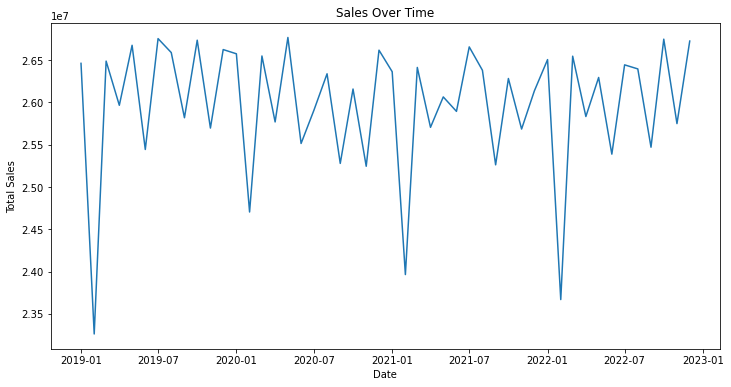

In [27]:
# Group by year and month, then sum the sales
sales_over_time = df.groupby(['year', 'month'])['sales'].sum().reset_index()

# Create a date column for plotting
sales_over_time['date'] = pd.to_datetime(sales_over_time[['year', 'month']].assign(day=1))

# Plot sales over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=sales_over_time, x='date', y='sales')
plt.title('Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.show()

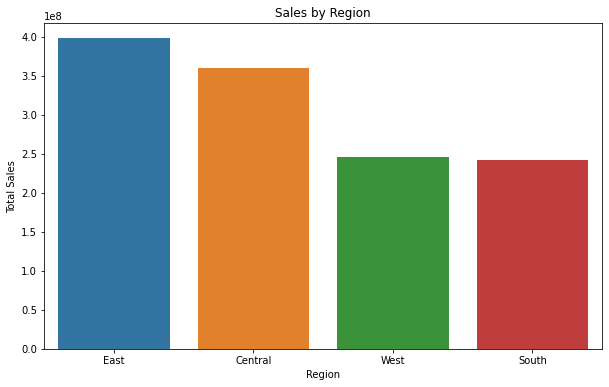

In [28]:
#Group by region and sum the sales
sales_by_region = df.groupby('region')['sales'].sum().sort_values(ascending=False)

#Plot sales by region
plt.figure(figsize=(10, 6))
sns.barplot(x=sales_by_region.index, y=sales_by_region.values)
plt.title('Sales by Region')
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.show()

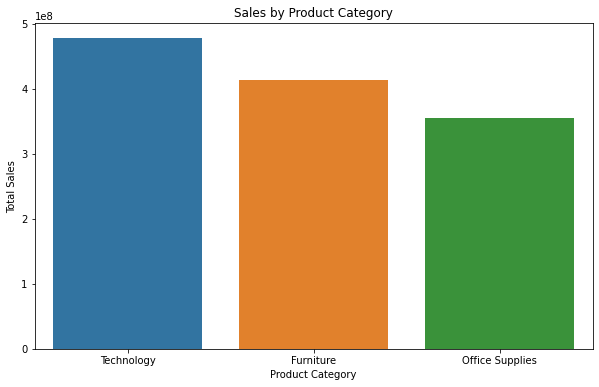

In [29]:
# Group by product category and sum the sales
sales_by_category = df.groupby('product_category')['sales'].sum().sort_values(ascending=False)

# Plot sales by product category
plt.figure(figsize=(10, 6))
sns.barplot(x=sales_by_category.index, y=sales_by_category.values)
plt.title('Sales by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Sales')
plt.show()

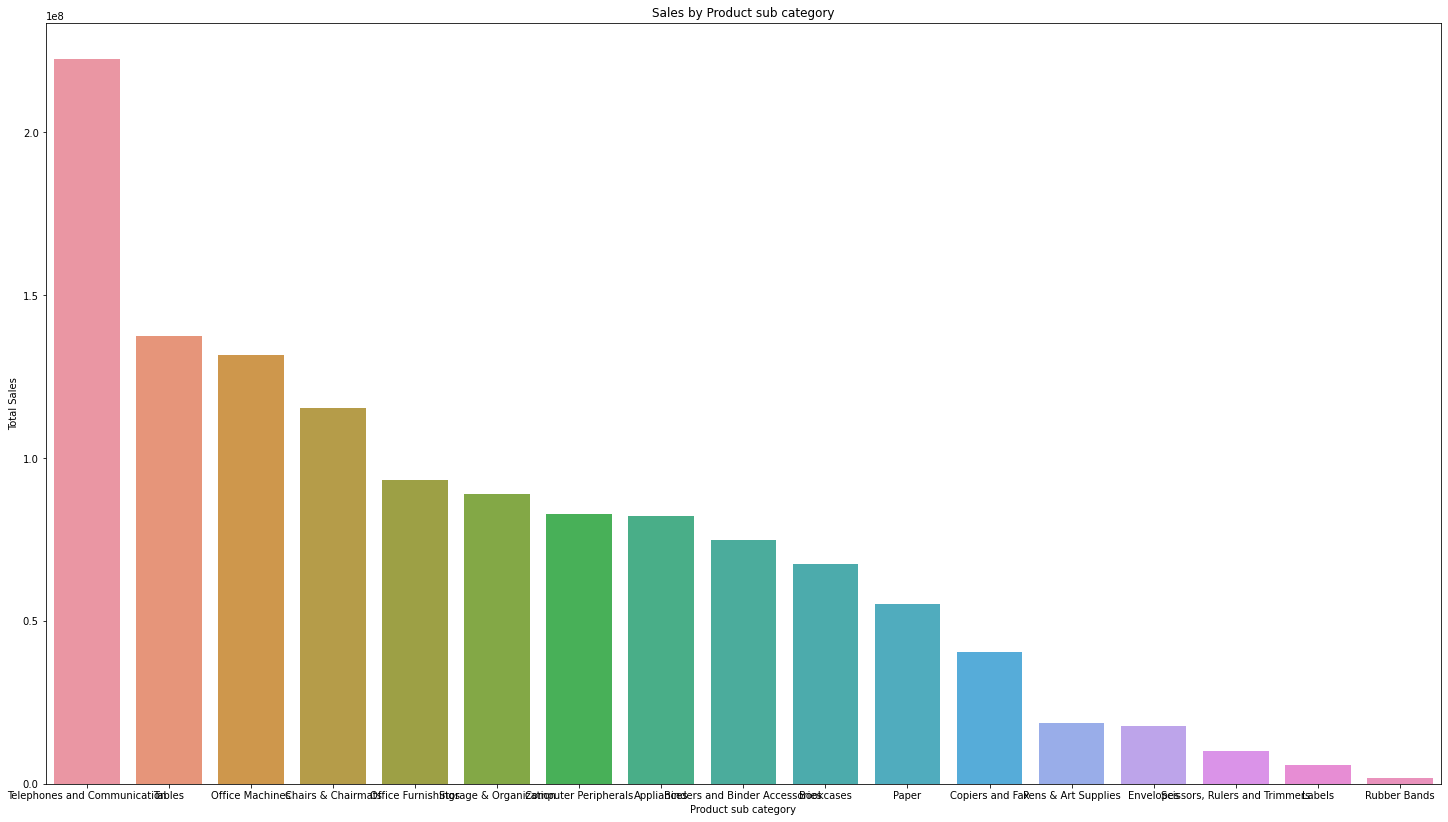

In [30]:
# Group by product category and sum the sales
sales_by_category = df.groupby('product_sub_category')['sales'].sum().sort_values(ascending=False)

# Plot sales by product category
plt.figure(figsize=(25, 14))
sns.barplot(x=sales_by_category.index, y=sales_by_category.values)
plt.title('Sales by Product sub category')
plt.xlabel('Product sub category')
plt.ylabel('Total Sales')
plt.show()

## the counts of categorical variables

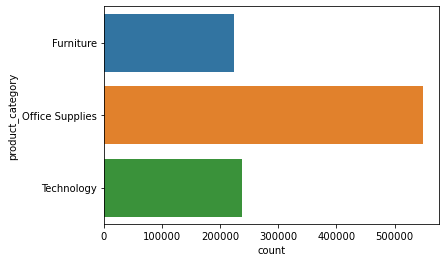

In [31]:
sns.countplot(y=df['product_category'])
plt.show()

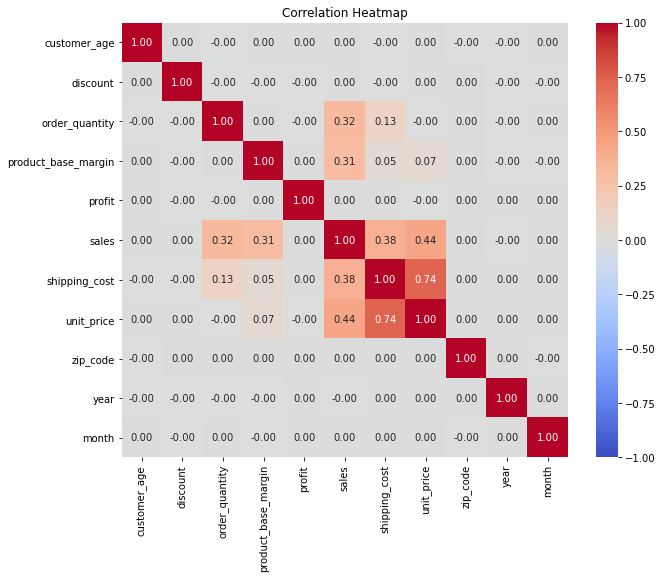

In [32]:
corr = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

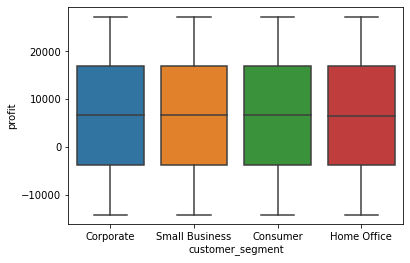

In [33]:
sns.boxplot(x='customer_segment', y='profit', data=df)
plt.show()

In [34]:
sales_by_category = df.groupby('product_category')['sales'].sum().reset_index()
print(sales_by_category)

  product_category         sales
0        Furniture  4.132295e+08
1  Office Supplies  3.556334e+08
2       Technology  4.776706e+08


In [35]:
sales_by_product_sub_category = df.groupby('product_sub_category')['sales'].sum().reset_index()
print(sales_by_product_sub_category)

              product_sub_category         sales
0                       Appliances  8.223397e+07
1   Binders and Binder Accessories  7.487542e+07
2                        Bookcases  6.745736e+07
3               Chairs & Chairmats  1.152284e+08
4             Computer Peripherals  8.282529e+07
5                  Copiers and Fax  4.061242e+07
6                        Envelopes  1.766837e+07
7                           Labels  5.850504e+06
8               Office Furnishings  9.315267e+07
9                  Office Machines  1.317205e+08
10                           Paper  5.530810e+07
11             Pens & Art Supplies  1.866939e+07
12                    Rubber Bands  1.849027e+06
13   Scissors, Rulers and Trimmers  1.015753e+07
14          Storage & Organization  8.902114e+07
15                          Tables  1.373910e+08
16    Telephones and Communication  2.225124e+08


In [36]:
unique_count = df['sales'].nunique()
print(f"Unique count: {unique_count}")

Unique count: 127203


In [37]:
max_value = df['sales'].max()
print(f"Maximum value: {max_value}")

Maximum value: 4408.89


In [38]:
min_value = df['sales'].min()
print(f"Minimum value: {min_value}")

Minimum value: 0.76
